In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns

# Author: Martin Luessi <mluessi@nmr.mgh.harvard.edu>
# License: BSD (3-clause)
from matplotlib.colors import TwoSlopeNorm

import os.path as op
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test

from mne_connectivity import spectral_connectivity_epochs, seed_target_indices
from mne.datasets import sample
from mne_connectivity.viz import plot_sensors_connectivity
from mne.stats import permutation_cluster_test
from scipy import stats as stats
from functools import partial

print(__doc__)

/cm/shared/apps/python/gpu/3.10.6/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Automatically created module for IPython interactive environment


In [2]:
dict015= {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FT9':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg','FT10':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','TP9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','TP10':'eeg','P7':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL':'emg','EmgR':'emg','EmgL(lc)':'emg','EmgR(lc)':'emg'}

dict013_imp = {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','FT9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','FT10':'eeg','TP9':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL':'emg','EmgR':'emg','EmgL(lc)':'emg','EmgR(lc)':'emg'}

dict013_exp = dict015

dict011_imp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg','F4':'eeg','Fz':'eeg','F3':'eeg',
              'F7':'eeg','FC6':'eeg','FC2':'eeg','FC1':'eeg','FC5':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg','T7':'eeg','FT10':'eeg',
               'CP6':'eeg','CP2':'eeg','CP1':'eeg', 'CP5':'eeg', 'FT9':'eeg', 'TP10':'eeg','P4':'eeg','Pz':'eeg','P3':'eeg','P7':'eeg','O2':'eeg',
               'O1':'eeg', 'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
              'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
             'DynR(lc)':'misc', 'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict011_exp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg','F4':'eeg','Fz':'eeg','F3':'eeg',
              'F7':'eeg','FT10':'eeg', 'FC6':'eeg','FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
               'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg', 'CP5':'eeg', 'TP9':'eeg', 'P8':'eeg','P4':'eeg','Pz':'eeg',
               'P3':'eeg','P7':'eeg','O2':'eeg', 'O1':'eeg', 'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs',
               'DBS6-7':'dbs','DBS7-8':'dbs', 'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
             'DynR(lc)':'misc', 'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}
           
    
#'DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs','mean(DBS1-234, DBS234-567, DBS567-8)':'dbs',

dict08_imp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','O2':'eeg','O1':'eeg',
                'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs', 
                'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',              
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',             
                'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict08_exp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FC6':'eeg', 'FC2':'eeg','FC1':'eeg','FC5':'eeg',
                'T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg', 'T7':'eeg','FT10':'eeg', 'CP6':'eeg','CP2':'eeg',
                'CP1':'eeg','CP5':'eeg','FT9':'eeg','TP10':'eeg', 'P4':'eeg','Pz':'eeg','P3':'eeg','P7':'eeg',
                'O2':'eeg','O1':'eeg',
                'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs', 
                'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',              
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',         
                'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict07_imp= {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','O2':'eeg','O1':'eeg',
                'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs',
                'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',
                'DynR':'misc','DynL':'misc','DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict07_exp= {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P8':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','P7':'eeg','O2':'eeg','O1':'eeg',
                'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs',
                'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',
                'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict_eog= {'FP1':'eog'}

In [3]:
base_dir = "/mnt/beegfs/malann/codes/Oddball_Project/Oddball Data/"
result_dir = "/mnt/beegfs/malann/codes/Oddball_Project/Results/"

subj_list = ['007','008','011','013','014','015']
subj_list = ['007']

stage = ['implant']#, 'implant']explant
aff_cond = ['1', '101'];
aff_cond_plot = ['Standard', 'Oddball'];

naff_cond = ['10', '110'];

for sub in subj_list:
    for st in stage:
        data_dir = base_dir+"EDEN"+sub+'/ANALYSIS/'
        fname = data_dir+"data_clean"+st+'.mat'
                
        if sub == '015' or sub=='014':
            dict1 = dict015
        elif sub == '013' and st== 'implant':
            dict1 = dict013_imp
        elif sub == '013' and st== 'explant':
            dict1 = dict013_exp
        elif sub == '011' and st== 'implant':
            dict1 = dict011_imp
        elif sub == '011' and st== 'explant':
            dict1 = dict011_exp
        elif sub == '008' and st== 'implant':
            dict1 = dict08_imp
        elif sub == '008' and st== 'explant':
            dict1 = dict08_exp
        elif sub == '007' and st== 'implant':
            dict1 = dict07_imp
        elif sub == '007' and st== 'explant':
            dict1 = dict07_exp

        info = mne.create_info(list(dict1.keys()), sfreq=200, ch_types='misc', verbose=None)
        epochs = mne.read_epochs_fieldtrip(fname,info,data_name='x', trialinfo_column=0)
        
        sfreq = epochs.info['sfreq']
        
        epochs.set_channel_types(dict1)

        kind='easycap-M1'
        mon = mne.channels.make_standard_montage(kind, head_size='auto')
        epochs.set_montage(mon,match_case=False, on_missing='ignore')
        
        epochs.filter(0.05,30)

        epochs_aff_odd = epochs[aff_cond[1]]
        epochs_aff_typ = epochs[aff_cond[0]]

        mne.epochs.equalize_epoch_counts([epochs_aff_odd,epochs_aff_typ], method='truncate')
        
        epochs_aff_odd.set_channel_types(dict_eog)
        epochs_aff_typ.set_channel_types(dict_eog)


Adding metadata with 9 columns
404 matching events found
No baseline correction applied
Setting up band-pass filter from 0.05 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.05 Hz (-6 dB cutoff frequency: 0.03 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 13201 samples (66.005 s)



/tmp/ipykernel_3951653/1575651086.py:40: RuntimeWarning: The unit for channel(s) AF3, AF4, AF7, AF8, AFz, C3, C4, CP1, CP2, CP5, CP6, Cz, DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8, EmgL, EmgL(lc), EmgR, EmgR(lc), F3, F4, F7, F8, FC1, FC2, FC5, FC6, FP1, FP2, FT10, FT9, Fz, O1, O2, P3, P4, Pz, T7, T8, TP10, TP9 has changed from NA to V.
  epochs.set_channel_types(dict1)
/tmp/ipykernel_3951653/1575651086.py:46: RuntimeWarning: filter_length (13201) is longer than the signal (1801), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(0.05,30)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Don

Dropped 0 epochs: 
Dropped 99 epochs: 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146


In [4]:
"""Average Baseline"""
epochs_aff_odd_norm1 =[] 
for ii,ch in enumerate(epochs_aff_odd.ch_names):
    x = np.hstack(epochs_aff_odd.get_data()[:, ii, :]) # 2D dim = epoch* ch* time to 1D dim, freq * (time *epoch)

    x_mean=x.mean() # mean of all the freqs across all the complete experiment session.
    epochs_aff_odd_norm=[]    
    for jj in range(epochs_aff_odd.get_data()[:, ii, :].shape[0]):
        epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean)/x_mean)) # applying normalaization on each trail
    epochs_aff_odd_norm1.append(epochs_aff_odd_norm)
epochs_aff_odd_norm1 = np.array(epochs_aff_odd_norm1)
epochs_aff_odd_norm1 = np.rollaxis(epochs_aff_odd_norm1,1) # normalized epoch data

epochs_aff_odd1 = mne.EpochsArray(epochs_aff_odd_norm1,  epochs_aff_odd.info, events=epochs_aff_odd.events, tmin=epochs_aff_odd.tmin)


"""Average Baseline"""
epochs_aff_typ_norm1 =[] 
for ii,ch in enumerate(epochs_aff_typ.ch_names):
    x = np.hstack(epochs_aff_typ.get_data()[:, ii, :]) # 2D dim = epoch* ch* time to 1D dim, freq * (time *epoch)

    x_mean=x.mean() # mean of all the freqs across all the complete experiment session.
    epochs_aff_typ_norm=[]    
    for jj in range(epochs_aff_typ.get_data()[:, ii, :].shape[0]):
        epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean)/x_mean)) # applying normalaization on each trail
    epochs_aff_typ_norm1.append(epochs_aff_typ_norm)
epochs_aff_typ_norm1 = np.array(epochs_aff_typ_norm1)
epochs_aff_typ_norm1 = np.rollaxis(epochs_aff_typ_norm1,1) # normalized epoch data

epochs_aff_typ1 = mne.EpochsArray(epochs_aff_typ_norm1,  epochs_aff_typ.info, events=epochs_aff_typ.events, tmin=epochs_aff_typ.tmin)



Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_3951653/932732752.py:9: RuntimeWarning: invalid value encountered in divide
  epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean)/x_mean)) # applying normalaization on each trail


Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_3951653/932732752.py:25: RuntimeWarning: invalid value encountered in divide
  epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean)/x_mean)) # applying normalaization on each trail


In [5]:
""""Coherence"""

picks = mne.pick_types(epochs_aff_odd1.info, eeg=True, dbs=True, emg= False,stim=False, eog=False,
                       exclude='bads')

epochs_aff_odd1.pick(['eeg','dbs'])
epochs_aff_typ1.pick(['eeg','dbs'])

# Use 'DBS' channels as seed
        
seed_chs = epochs_aff_odd1.copy().pick('dbs').ch_names
coh_diff = []
for seed_ch in seed_chs:
    
    picks_ch_names = epochs_aff_odd1.ch_names
    # Create seed-target indices for connectivity computation
    seed = picks_ch_names.index(seed_ch)
    targets = np.arange(len(picks))
    indices = seed_target_indices(seed, targets)


    freq_band = ['Theta', 'Alpha', 'Low beta', 'High beta']
    min_freq = (4, 8,13,21)
    max_freq = (7, 12,20,30)

    
    # Define wavelet frequencies and number of cycles
    cwt_freqs = np.arange(1, 41, 1)
    cwt_n_cycles = 7

    # Run the connectivity analysis using 2 parallel jobs
    con_odd = spectral_connectivity_epochs(
        epochs_aff_odd1, indices=indices,
        method='coh', mode='cwt_morlet', sfreq=sfreq, fmin = min_freq, fmax = max_freq, faverage =True, tmin = 0, tmax =1.5,
        cwt_freqs=cwt_freqs, cwt_n_cycles=cwt_n_cycles, n_jobs=30)

    con_typ = spectral_connectivity_epochs(
        epochs_aff_typ1, indices=indices,
        method='coh', mode='cwt_morlet', sfreq=sfreq, fmin = min_freq, fmax = max_freq, faverage =True, tmin = 0, tmax =1.5,
        cwt_freqs=cwt_freqs, cwt_n_cycles=cwt_n_cycles, n_jobs=30)

    times = con_odd.times
    freqs = con_odd.freqs

    # Mark the seed channel with a value of 1.0, so we can see it in the plot
    # con_odd.get_data()[np.where(indices[1] == seed)] = 1.0
    # con_typ.get_data()[np.where(indices[1] == seed)] = 1.0

    #layout = mne.find_layout(epochs.info, 'eeg')  # use full layout
    tfr_odd = mne.time_frequency.AverageTFR(epochs_aff_odd1.info, con_odd.get_data(), times, freqs, len(epochs_aff_odd1))
    #tfr_odd.save(result_dir+'tfr_odd'+st+seed_ch+'-tfr.h5',overwrite =True)

    tfr_typ = mne.time_frequency.AverageTFR(epochs_aff_typ1.info, con_typ.get_data(), times, freqs, len(epochs_aff_typ1))
    #tfr_typ.save(result_dir+'tfr_typ'+st+seed_ch+'-tfr.h5',overwrite =True)
    
    # TFR differences in freq bands and time period 0 to 1.5s

    tfr = tfr_odd- tfr_typ

    freq_band = ['Theta', 'Alpha', 'Low beta', 'High beta']

    
    n_channels = len(tfr.copy().pick('eeg').ch_names)
    X1 = []
    for n, band in enumerate(freq_band):
        tfr_ch = []
        for ch in range(n_channels):
            tfr_ch.append((tfr.data[:,:,:].mean(axis=2)[ch,n]))

        tfr_ch = np.array(tfr_ch).reshape(n_channels,1)   
        X1.append(tfr_ch)

    coh_diff.append(X1)

coh_diff = np.array(coh_diff)

file = result_dir+ 'coh_diff_' +sub+'_'+ st
np.save(file, coh_diff)

Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '101': 48>, so metadata was not modified.
  con_odd = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/cm/shared/apps/python/gpu/3.10.6/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/cm/shared/apps/python/gpu/3.10.6/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/cm/shared/apps/python/gpu/3.10.6/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:31: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '1': 48>, so metadata was not modified.
  con_typ = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer si

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '101': 48>, so metadata was not modified.
  con_odd = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer 

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:31: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '1': 48>, so metadata was not modified.
  con_typ = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer si

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '101': 48>, so metadata was not modified.
  con_odd = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer 

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:31: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '1': 48>, so metadata was not modified.
  con_typ = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer si

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '101': 48>, so metadata was not modified.
  con_odd = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer 

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:31: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '1': 48>, so metadata was not modified.
  con_typ = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer si

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '101': 48>, so metadata was not modified.
  con_odd = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer 

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:31: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '1': 48>, so metadata was not modified.
  con_typ = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer si

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '101': 48>, so metadata was not modified.
  con_odd = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer 

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:31: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '1': 48>, so metadata was not modified.
  con_typ = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer si

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '101': 48>, so metadata was not modified.
  con_odd = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer 

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:31: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '1': 48>, so metadata was not modified.
  con_typ = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer si

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '101': 48>, so metadata was not modified.
  con_odd = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer 

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:31: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '1': 48>, so metadata was not modified.
  con_typ = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer si

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '101': 48>, so metadata was not modified.
  con_odd = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer 

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 42 connections
    using t=-3.000s..6.000s for estimation (1801 points)
    frequencies: 1.0Hz..40.0Hz (40 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..30


/tmp/ipykernel_3951653/4068311939.py:31: RuntimeWarning: There were no Annotations stored in <EpochsArray |  48 events (all good), -3 – 6 s, baseline off, ~27.8 MB, data loaded,
 '1': 48>, so metadata was not modified.
  con_typ = spectral_connectivity_epochs(
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer si

    computing connectivity for epochs 31..48


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavelets.
  return [func(*args, **kwargs)
/home/malann/.local/lib/python3.10/site-packages/joblib/parallel.py:589: UserWarning: At least one of the wavelets (2229) is longer than the signal (1801). Consider using a longer signal or shorter wavel

[Connectivity computation done]


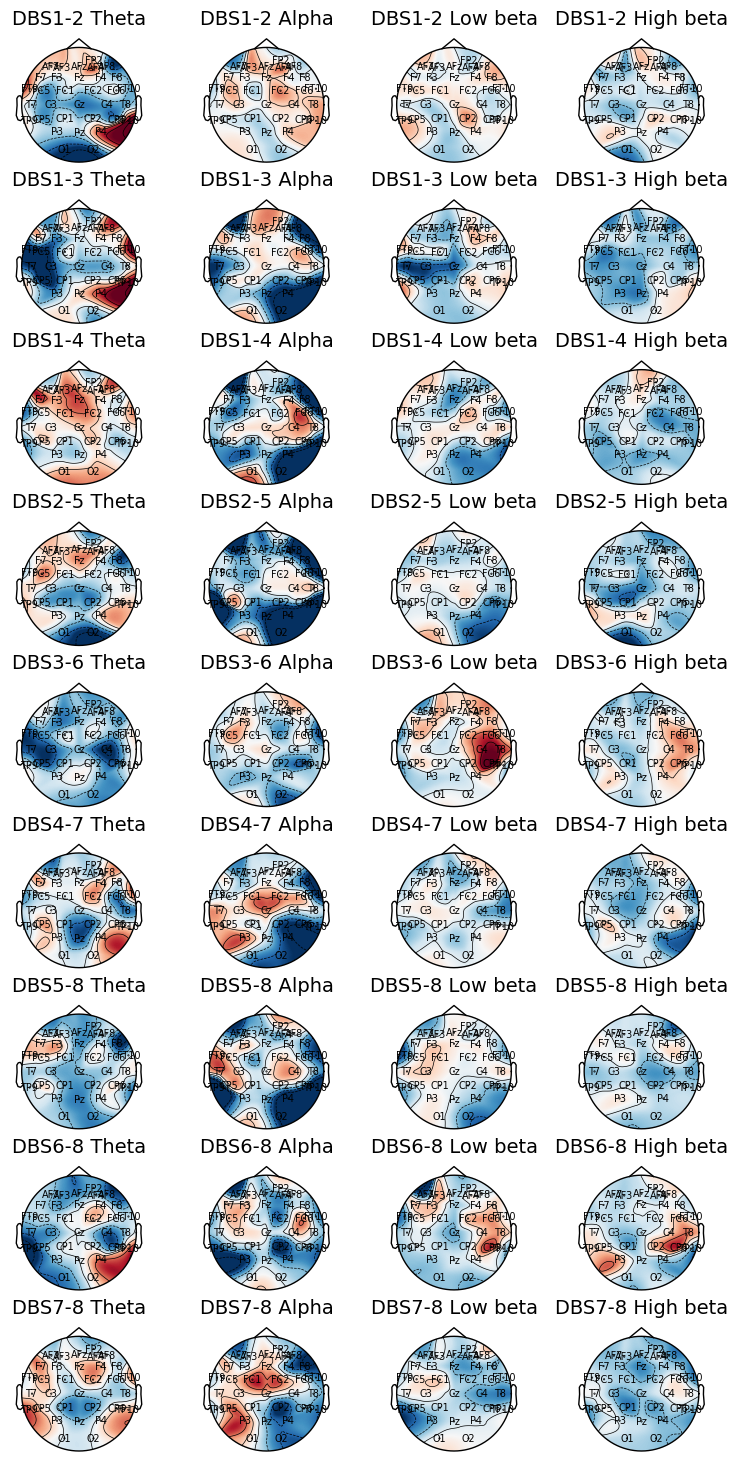

In [6]:
fig, axes = plt.subplots(figsize=(7.5, 14.5), nrows=9, ncols=len(freq_band), layout="constrained")

freq_band = ['Theta', 'Alpha', 'Low beta', 'High beta']
min_freq = [4, 8,13,21]
max_freq = [7, 12,20,30]

mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k',
                    linewidth=0, markersize=4)

for n_ch, (axes_row, seed_ch) in enumerate(zip(axes, seed_chs)):

    n_channels = len(tfr.copy().pick('eeg').ch_names)

    for n, (ax, band) in enumerate(zip(axes_row, freq_band)):

        tfr_evoked = mne.EvokedArray(coh_diff[n_ch,n,:,:], epochs_aff_odd.copy().pick('eeg').info)
        
        tfr_evoked.plot_topomap(0.0,show_names=True,size=2,vlim=(-0.8e5,1e5),cmap='RdBu_r',axes=ax,show=False, colorbar =False)
        
        ax.set_title("%s %s" % (seed_ch.upper(), band), fontsize=14)


In [ ]:
coh_diff_permuted.shape